In [5]:
#!pip install pydotplus

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from six import StringIO
#from sklearn.externals.six import StringIO
from IPython.display import Image

In [6]:
data = pd.read_csv("heart.csv")

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
data.shape

(303, 14)

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
corr = data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


C:\Users\hansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '0: Patients not having a heart disease, 1: Patients having a heart disease')

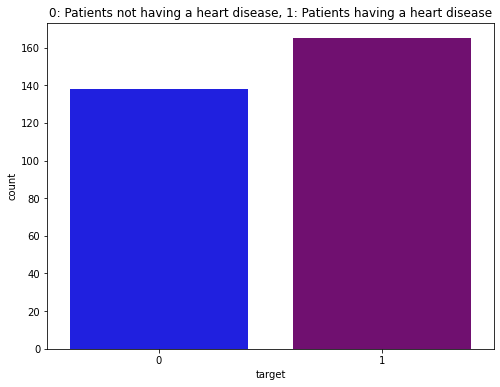

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data.target, palette = ['blue', 'purple'])
plt.title("0: Patients not having a heart disease, 1: Patients having a heart disease")

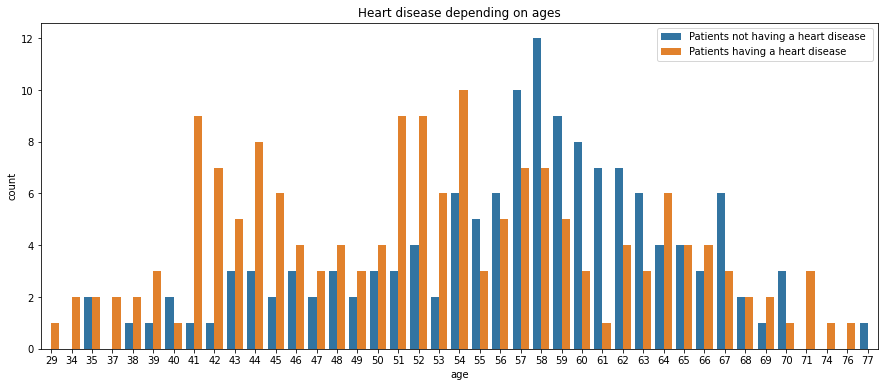

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='age', hue='target', data=data)
plt.title("Heart disease depending on ages")
plt.legend(["Patients not having a heart disease ", "Patients having a heart disease "], loc="upper right")

<AxesSubplot:>

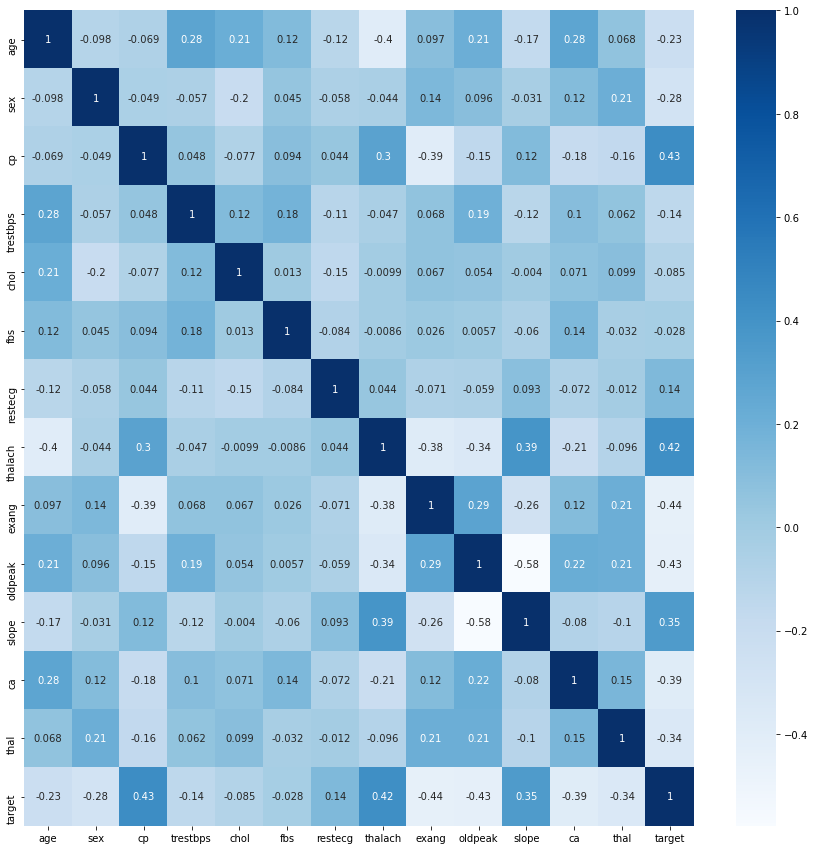

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="Blues")

In [19]:
x = pd.DataFrame(data.iloc[:, :-1]) #remove last column
y = pd.DataFrame(data.iloc[:, -1]) #only last column

In [20]:
x.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212, 1)
(91, 1)


In [33]:
model_1 = LogisticRegression(max_iter=3000)
model_1.fit(x_train,y_train.values.ravel())

LogisticRegression(max_iter=3000)

In [34]:
y_pred_model_1 = model_1.predict(x_test)

In [35]:
y_pred_model_1 = pd.DataFrame(y_pred_model_1, columns=['Predicted Values'])
y_pred_model_1.head()

,Predicted Values
0,0
1,1
2,0
3,0
4,0


In [36]:
conf_mat_model_1 = confusion_matrix (y_test, y_pred_model_1)
print (" Confusion Matrix for Logistic Regression Model: ")
conf_mat_model_1

 Confusion Matrix for Logistic Regression Model: 


array([[29, 12],
       [ 8, 42]], dtype=int64)

In [37]:
accuracy_model_1 = accuracy_score (y_test, y_pred_model_1)
print ("Accuracy for Logistic Regression Model: ")
accuracy_model_1

Accuracy for Logistic Regression Model: 


0.7802197802197802

In [38]:
model_2 = DecisionTreeClassifier()
model_2.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred_model_2 = model_2.predict(x_test)

In [40]:
y_pred_model_2 = pd.DataFrame(y_pred_model_2, columns = ['Predicted Values'])
y_pred_model_2.head()

,Predicted Values
0,0
1,1
2,0
3,0
4,0


In [41]:
conf_mat_model_2 = confusion_matrix (y_test, y_pred_model_2)
print("Confusion Matrix for Decission Tree Model: ")
conf_mat_model_2

Confusion Matrix for Decission Tree Model: 


array([[32,  9],
       [15, 35]], dtype=int64)

In [43]:
accuracy_model_2 = accuracy_score(y_test, y_pred_model_2)
print("Accuracy for Decission Tree Model: ")
accuracy_model_2

Accuracy for Decission Tree Model: 


0.7362637362637363

In [44]:
dot_data = StringIO()

In [46]:
export_graphviz(model_2, out_file = dot_data)

In [47]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dot_data.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 0.5\\ngini = 0.496\\nsamples = 212\\nvalue = [97, 115]"] ;\n1 [label="X[8] <= 0.5\\ngini = 0.367\\nsamples = 99\\nvalue = [75, 24]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[11] <= 0.5\\ngini = 0.5\\nsamples = 43\\nvalue = [21, 22]"] ;\n1 -> 2 ;\n3 [label="X[12] <= 2.5\\ngini = 0.278\\nsamples = 24\\nvalue = [4, 20]"] ;\n2 -> 3 ;\n4 [label="X[7] <= 96.5\\ngini = 0.105\\nsamples = 18\\nvalue = [1, 17]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 17\\nvalue = [0, 17]"] ;\n4 -> 6 ;\n7 [label="X[4] <= 215.0\\ngini = 0.5\\nsamples = 6\\nvalue = [3, 3]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n7 -> 8 ;\n9 [label="X[0] <= 53.5\\ngini = 0.375\\nsamples = 4\\nvalue = [3, 1]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n9 -> 10 ;\n11 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 

In [50]:
!pip install graphviz

In [52]:
model_3 = RandomForestClassifier()
model_3.fit(x_train, y_train)

<ipython-input-52-e3a0f4d2c023>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(x_train, y_train)


RandomForestClassifier()

In [53]:
y_pred_model_3 = model_3.predict(x_test)

In [54]:
y_pred_model_3 = pd.DataFrame(y_pred_model_3, columns=['Predicted Values'])
y_pred_model_3.head()

,Predicted Values
0,0
1,1
2,0
3,0
4,0


In [55]:
conf_mat_model_3 = confusion_matrix(y_test, y_pred_model_3)
print("Confusion Matrix for Random Forest Model: ")
conf_mat_model_3

Confusion Matrix for Random Forest Model: 


array([[28, 13],
       [12, 38]], dtype=int64)

In [56]:
accuracy_model_3 = accuracy_score(y_test, y_pred_model_3)
print ("Accuracy for Random Forest Model: ")
accuracy_model_3

Accuracy for Random Forest Model: 


0.7252747252747253

In [57]:
dot_data_RF = StringIO()

In [58]:
export_graphviz(model_3.estimators_[0], out_file = dot_data_RF)

In [59]:
graph = pydotplus.graph_from_dot_data(dot_data_RF.getvalue())
dot_data_RF.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 0.5\\ngini = 0.496\\nsamples = 127\\nvalue = [97, 115]"] ;\n1 [label="X[10] <= 1.5\\ngini = 0.28\\nsamples = 59\\nvalue = [74, 15]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[9] <= 0.8\\ngini = 0.183\\nsamples = 39\\nvalue = [53, 6]"] ;\n1 -> 2 ;\n3 [label="X[12] <= 2.5\\ngini = 0.496\\nsamples = 6\\nvalue = [6, 5]"] ;\n2 -> 3 ;\n4 [label="X[9] <= 0.3\\ngini = 0.48\\nsamples = 3\\nvalue = [2, 3]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [2, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 3]"] ;\n4 -> 6 ;\n7 [label="X[4] <= 268.5\\ngini = 0.444\\nsamples = 3\\nvalue = [4, 2]"] ;\n3 -> 7 ;\n8 [label="X[11] <= 2.5\\ngini = 0.444\\nsamples = 2\\nvalue = [1, 2]"] ;\n7 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 2]"] ;\n8 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n8 -> 10 ;\n11 [label="gini = 0.0\\nsamples = 1\\nvalue = [3, 0]"] ;

In [61]:
print (" Confusion Matrix for Logistic Regression: ")
print (conf_mat_model_1)
print (" Confusion Matrix for Decision Tree: ")
print (conf_mat_model_2)
print (" Confusion Matrix for Random Forest: ")
print (conf_mat_model_3)

 Confusion Matrix for Logistic Regression: 
[[29 12]
 [ 8 42]]
 Confusion Matrix for Decision Tree: 
[[32  9]
 [15 35]]
 Confusion Matrix for Random Forest: 
[[28 13]
 [12 38]]


In [62]:
print (" Classification Report for Logistic Regression: ")
classification_report(y_test, y_pred_model_1)

 Classification Report for Logistic Regression: 


'              precision    recall  f1-score   support\n\n           0       0.78      0.71      0.74        41\n           1       0.78      0.84      0.81        50\n\n    accuracy                           0.78        91\n   macro avg       0.78      0.77      0.78        91\nweighted avg       0.78      0.78      0.78        91\n'

In [63]:
print (" Classification Report for Decision Tree: ")
classification_report(y_test, y_pred_model_2)

 Classification Report for Decision Tree: 


'              precision    recall  f1-score   support\n\n           0       0.68      0.78      0.73        41\n           1       0.80      0.70      0.74        50\n\n    accuracy                           0.74        91\n   macro avg       0.74      0.74      0.74        91\nweighted avg       0.74      0.74      0.74        91\n'

In [64]:
print (" Classification Report for Random Forest: ")
classification_report(y_test, y_pred_model_3)

 Classification Report for Random Forest: 


'              precision    recall  f1-score   support\n\n           0       0.70      0.68      0.69        41\n           1       0.75      0.76      0.75        50\n\n    accuracy                           0.73        91\n   macro avg       0.72      0.72      0.72        91\nweighted avg       0.72      0.73      0.72        91\n'

In [65]:
score = { 'Logistic_Reg': [accuracy_model_1] , 'Decision_Tree': [accuracy_model_2], 'Random_Forest': [accuracy_model_3]}
score_df = pd.DataFrame(score)
score_df

,Logistic_Reg,Decision_Tree,Random_Forest
0,0.78022,0.736264,0.725275


<AxesSubplot:>

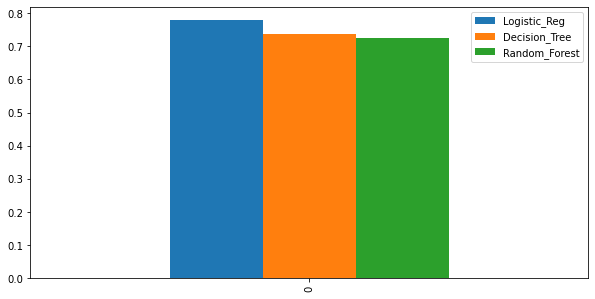

In [66]:
score_df.plot(kind='bar', figsize=(10, 5))

In [67]:
conf_mat_final = {'Logistic_Reg': conf_mat_model_1, 'Decision_Tree': conf_mat_model_2, 'Random_Forest': conf_mat_model_3 }

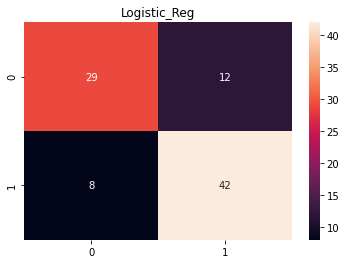

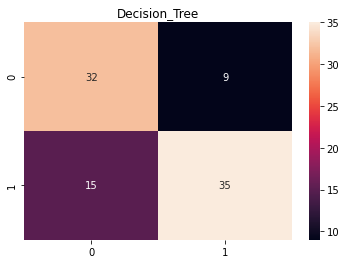

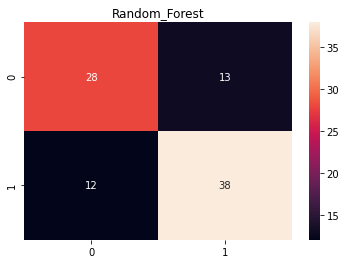

In [68]:
for label,matrix in conf_mat_final.items():
    plt.title (label)
    sns.heatmap(matrix, annot=True)
    plt.show()

In [69]:
print (" Accuracy for Logistic Regression: ")
print (accuracy_model_1)
print (" Accuracy for Decision Tree: ")
print (accuracy_model_2)
print (" Accuracy for Random Forest: ")
print (accuracy_model_3)

 Accuracy for Logistic Regression: 
0.7802197802197802
 Accuracy for Decision Tree: 
0.7362637362637363
 Accuracy for Random Forest: 
0.7252747252747253


In [70]:
print ("The best model based on the best accuracies is Logistic Regression with accuracy: ")
print (accuracy_model_1)

The best model based on the best accuracies is Logistic Regression with accuracy: 
0.7802197802197802
